In [601]:
!pip install dmba
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pylab as plt
from dmba import classificationSummary, regressionSummary

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.formula.api as sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Data Information

In [602]:
df = pd.read_csv('transaction_dataset.csv')
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [ ]:
df.info()

In [604]:
df.shape

(9841, 51)

In [605]:
print(df['FLAG'].value_counts())

0    7662
1    2179
Name: FLAG, dtype: int64


In [606]:
%matplotlib inline
plt.close('all')

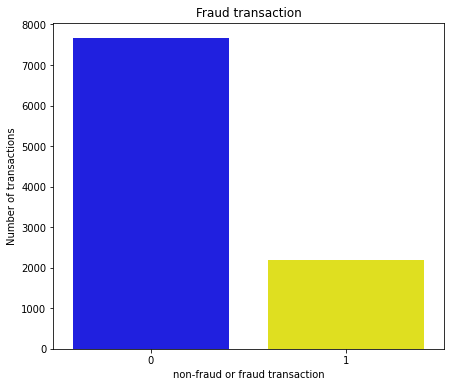

In [607]:
plt.figure(figsize = (7,6))
import seaborn as sns
sns.countplot(df['FLAG'], alpha = 1, palette= ['blue','yellow'])
plt.title('Fraud transaction')
plt.ylabel('Number of transactions')
plt.xlabel('non-fraud or fraud transaction')
plt.show()
#The bar graph shows that the data set is imbalanced and it needs to take an action in further modeling processes.

In [ ]:
df.var()

#Data Exploring

In [609]:
df1 = df.drop(columns=['Unnamed: 0','Index','Address'])
#df1.head(5)

In [610]:
df1.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [611]:
import scipy
from scipy.stats import skew

In [612]:
df1.skew().sort_values(ascending=False)

avg val received                                        96.513680
 ERC20 avg val sent                                     94.919941
 ERC20 max val sent                                     94.904137
 ERC20 min val sent                                     94.882248
 ERC20 max val rec                                      94.833841
 ERC20 total Ether received                             94.806604
 ERC20 total ether sent                                 94.786924
min value sent to contract                              79.849427
max val sent to contract                                78.848894
total ether sent contracts                              78.848737
min val sent                                            73.426748
 ERC20 avg val rec                                      71.026899
avg value sent to contract                              63.607723
total Ether sent                                        62.363237
max val sent                                            59.833713
 ERC20 tot

In [614]:
# Making the names of variables to be used easily and clear in future work.
df1.columns = [c.replace(' ', '_') for c in df1.columns]
#df1.columns

In [615]:
df1._ERC20_most_sent_token_type = df1._ERC20_most_sent_token_type.astype('category')
df1._ERC20_most_rec_token_type = df1._ERC20_most_rec_token_type.astype('category')

In [616]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9836    False
9837     True
9838    False
9839    False
9840    False
Length: 9841, dtype: bool

In [ ]:
df1.drop_duplicates()

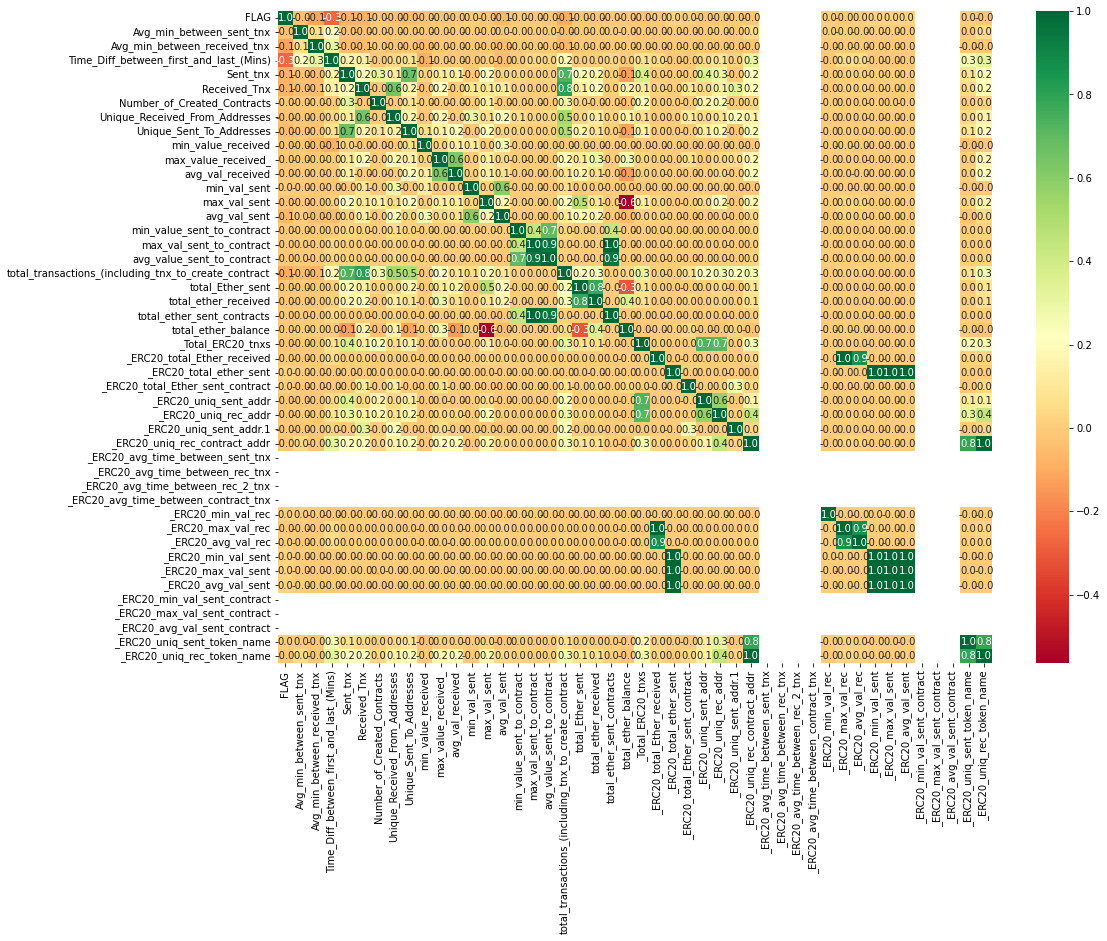

In [618]:
fig, ax = plt.subplots(figsize=(16,12))
corr=df1.corr()
import seaborn as sns
sns.heatmap(corr, annot=True, fmt='.1f', cmap='RdYlGn')

#Data Cleaning

By looking at the result of the correlation between variables in heatmap, some variables that are not effective in building a model and analysis of the fraud transaction can be found and these variables will be dropped. The two categorical variables are not shown in the heatmap and so they are considered to be useless for predicting the fraud.

In [619]:
df1 = df1.drop(columns=['_ERC20_avg_time_between_sent_tnx','_ERC20_avg_time_between_rec_tnx',
                        '_ERC20_avg_time_between_rec_2_tnx','_ERC20_avg_time_between_contract_tnx',
                        '_ERC20_min_val_sent_contract','_ERC20_max_val_sent_contract','_ERC20_avg_val_sent_contract',
                        '_ERC20_most_sent_token_type','_ERC20_most_rec_token_type'])

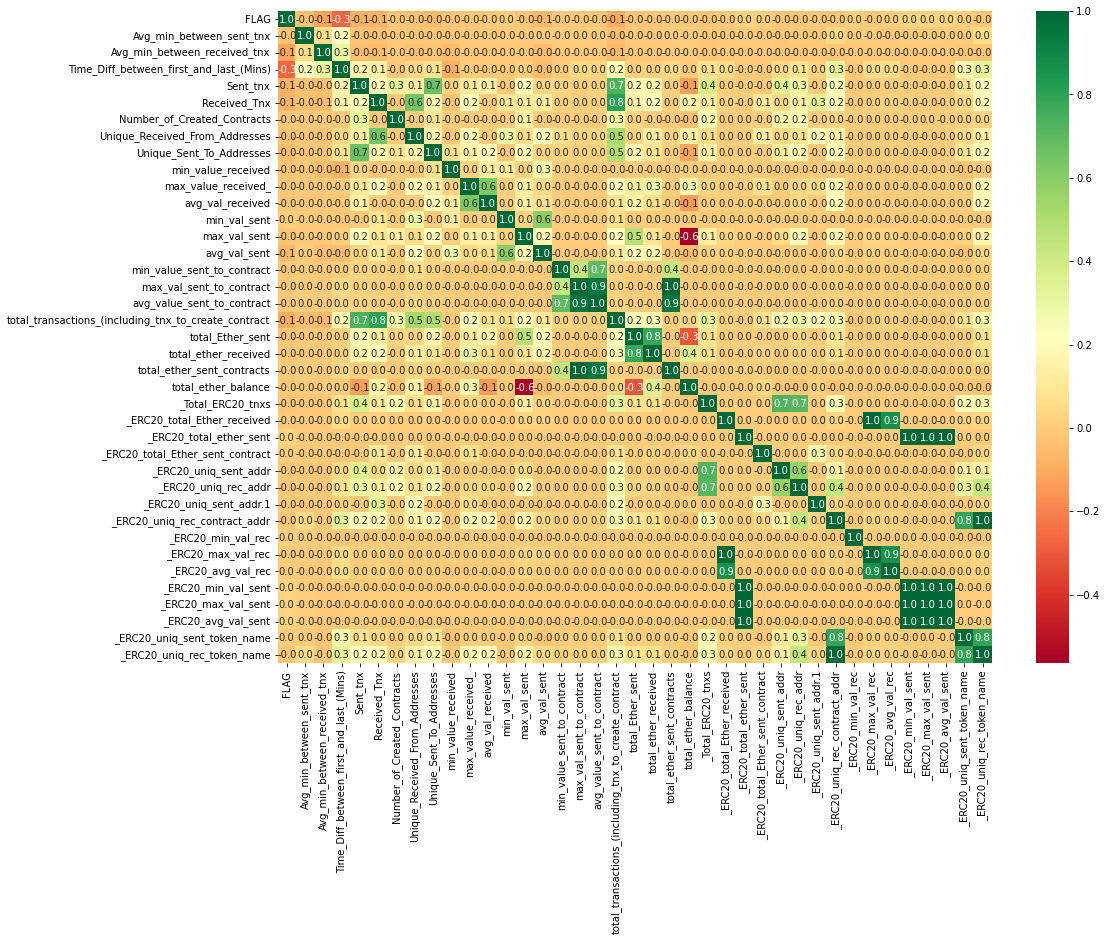

In [620]:
fig, ax1 = plt.subplots(figsize=(16,12))
corr1=df1.corr()
import seaborn as sns
sns.heatmap(corr1, annot=True, fmt='.1f', cmap='RdYlGn')

In [621]:
#Variables with correlations greater than 0.7 are dropped in order to avoid multicolinearity in building the model.
df1 = df1.drop(columns=['total_transactions_(including_tnx_to_create_contract','avg_value_sent_to_contract',
                        '_Total_ERC20_tnxs','_ERC20_avg_val_sent','Unique_Sent_To_Addresses',
                        '_ERC20_avg_val_rec','_ERC20_uniq_sent_token_name','_ERC20_uniq_rec_contract_addr',
                        '_ERC20_uniq_sent_addr','min_value_sent_to_contract','max_val_sent_to_contract',
                        '_ERC20_max_val_sent','_ERC20_total_Ether_received','_ERC20_total_ether_sent'])

In [ ]:
df1.head()

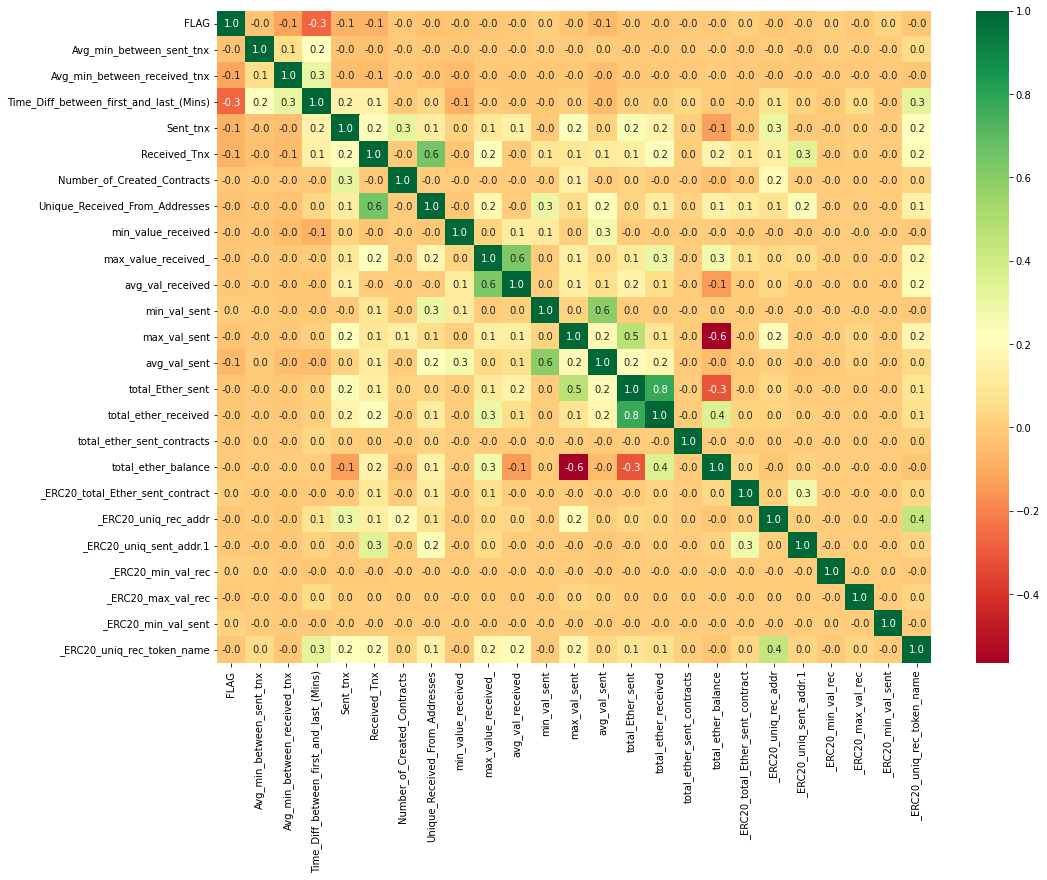

In [623]:
fig, ax1 = plt.subplots(figsize=(16,12))
corr2=df1.corr()
import seaborn as sns
sns.heatmap(corr2, annot=True, fmt='.1f', cmap='RdYlGn')

In [624]:
df1.columns
print(df1.shape)

(9841, 25)


In [625]:
df1.count()

FLAG                                       9841
Avg_min_between_sent_tnx                   9841
Avg_min_between_received_tnx               9841
Time_Diff_between_first_and_last_(Mins)    9841
Sent_tnx                                   9841
Received_Tnx                               9841
Number_of_Created_Contracts                9841
Unique_Received_From_Addresses             9841
min_value_received                         9841
max_value_received_                        9841
avg_val_received                           9841
min_val_sent                               9841
max_val_sent                               9841
avg_val_sent                               9841
total_Ether_sent                           9841
total_ether_received                       9841
total_ether_sent_contracts                 9841
total_ether_balance                        9841
_ERC20_total_Ether_sent_contract           9012
_ERC20_uniq_rec_addr                       9012
_ERC20_uniq_sent_addr.1                 

In [626]:
df1.skew().sort_values(ascending=False)

avg_val_received                           96.513680
_ERC20_min_val_sent                        94.882248
_ERC20_max_val_rec                         94.833841
total_ether_sent_contracts                 78.848737
min_val_sent                               73.426748
total_Ether_sent                           62.363237
max_val_sent                               59.833713
_ERC20_total_Ether_sent_contract           59.280265
total_ether_received                       58.795284
Number_of_Created_Contracts                51.720220
_ERC20_min_val_rec                         50.535806
max_value_received_                        46.423682
_ERC20_uniq_rec_addr                       37.586021
avg_val_sent                               25.531087
_ERC20_uniq_sent_addr.1                    23.720828
min_value_received                         23.295883
Unique_Received_From_Addresses             18.116107
_ERC20_uniq_rec_token_name                 15.538524
Sent_tnx                                   10.

In [627]:
df1.isnull().sum()

FLAG                                         0
Avg_min_between_sent_tnx                     0
Avg_min_between_received_tnx                 0
Time_Diff_between_first_and_last_(Mins)      0
Sent_tnx                                     0
Received_Tnx                                 0
Number_of_Created_Contracts                  0
Unique_Received_From_Addresses               0
min_value_received                           0
max_value_received_                          0
avg_val_received                             0
min_val_sent                                 0
max_val_sent                                 0
avg_val_sent                                 0
total_Ether_sent                             0
total_ether_received                         0
total_ether_sent_contracts                   0
total_ether_balance                          0
_ERC20_total_Ether_sent_contract           829
_ERC20_uniq_rec_addr                       829
_ERC20_uniq_sent_addr.1                    829
_ERC20_min_va

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bb6167550>,
      dtype=object)

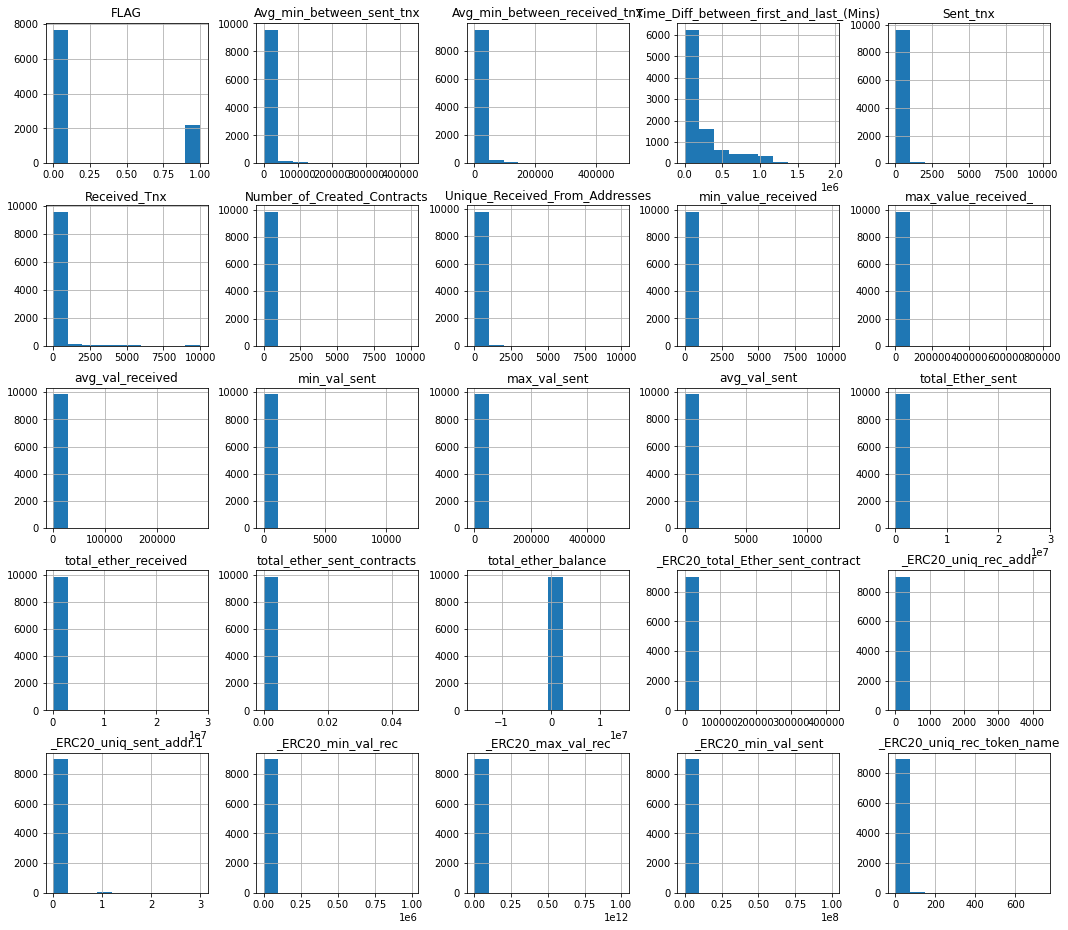

In [628]:
df1.hist(figsize = (18,16))

In [629]:
df1.describe()

,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,min_value_received,max_value_received_,...,total_ether_received,total_ether_sent_contracts,total_ether_balance,_ERC20_total_Ether_sent_contract,_ERC20_uniq_rec_addr,_ERC20_uniq_sent_addr.1,_ERC20_min_val_rec,_ERC20_max_val_rec,_ERC20_min_val_sent,_ERC20_uniq_rec_token_name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.841000e+03,9841.000000,9.841000e+03,9012.000000,9012.000000,9012.000000,9012.000000,9.012000e+03,9.012000e+03,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,43.845153,523.152481,...,1.163832e+04,0.000008,1.477395e+03,110.939207,7.598535,0.003440,485.614688,1.252524e+08,1.174126e+04,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,325.929139,13008.821539,...,3.642048e+05,0.000516,2.424254e+05,6128.634953,81.818470,0.065698,16883.278712,1.053741e+10,1.053567e+06,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,-1.560535e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,0.001000,1.000000,...,2.670424e+00,0.000000,6.214900e-04,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,0.095856,6.000000,...,3.052963e+01,0.000000,1.722000e-03,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,2.000000,67.067040,...,1.010000e+02,0.000000,4.452000e-02,0.000000,2.000000,0.000000,0.001523,9.900000e+01,0.000000e+00,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,10000.000000,800000.000000,...,2.858159e+07,0.046029,1.428864e+07,416000.000000,4293.000000,3.000000,990000.000000,1.000000e+12,1.000000e+08,737.000000


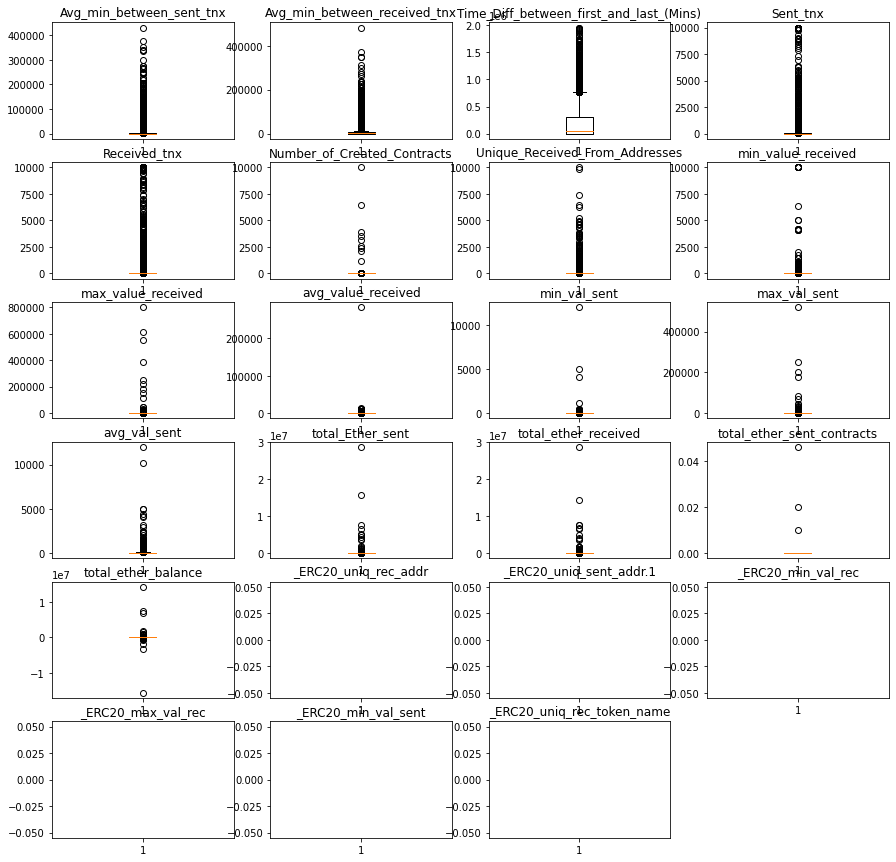

In [630]:
from IPython.core.pylabtools import figsize
f = plt.figure(figsize=(15,15))
plt.subplot(6, 4, 1)
plt.boxplot(df1['Avg_min_between_sent_tnx'])
plt.title("Avg_min_between_sent_tnx")

plt.subplot(6, 4, 2)
plt.boxplot(df1['Avg_min_between_received_tnx'])
plt.title("Avg_min_between_received_tnx")

plt.subplot(6, 4, 3)
plt.boxplot(df1['Time_Diff_between_first_and_last_(Mins)'])
plt.title("Time_Diff_between_first_and_last_(Mins)")

plt.subplot(6, 4, 4)
plt.boxplot(df1['Sent_tnx'])
plt.title("Sent_tnx")

plt.subplot(6, 4, 5)
plt.boxplot(df1['Received_Tnx'])
plt.title("Received_tnx")

plt.subplot(6, 4, 6)
plt.boxplot(df1['Number_of_Created_Contracts'])
plt.title("Number_of_Created_Contracts")

plt.subplot(6, 4, 7)
plt.boxplot(df1['Unique_Received_From_Addresses'])
plt.title("Unique_Received_From_Addresses")

plt.subplot(6, 4, 8)
plt.boxplot(df1['min_value_received'])
plt.title("min_value_received")

plt.subplot(6, 4, 9)
plt.boxplot(df1['max_value_received_'])
plt.title("max_value_received")

plt.subplot(6, 4, 10)
plt.boxplot(df1['avg_val_received'])
plt.title("avg_value_received")

plt.subplot(6, 4, 11)
plt.boxplot(df1['min_val_sent'])
plt.title("min_val_sent")

plt.subplot(6, 4, 12)
plt.boxplot(df1['max_val_sent'])
plt.title("max_val_sent")

plt.subplot(6, 4, 13)
plt.boxplot(df1['avg_val_sent'])
plt.title("avg_val_sent")

plt.subplot(6, 4, 14)
plt.boxplot(df1['total_Ether_sent'])
plt.title("total_Ether_sent")

plt.subplot(6, 4, 15)
plt.boxplot(df1['total_ether_received'])
plt.title("total_ether_received")

plt.subplot(6, 4, 16)
plt.boxplot(df1['total_ether_sent_contracts'])
plt.title("total_ether_sent_contracts")

plt.subplot(6, 4, 17)
plt.boxplot(df1['total_ether_balance'])
plt.title("total_ether_balance")

plt.subplot(6, 4, 18)
plt.boxplot(df1['_ERC20_uniq_rec_addr'])
plt.title("_ERC20_uniq_rec_addr")

plt.subplot(6, 4, 19)
plt.boxplot(df1['_ERC20_uniq_sent_addr.1'])
plt.title("_ERC20_uniq_sent_addr.1")

plt.subplot(6, 4, 20)
plt.boxplot(df1['_ERC20_min_val_rec'])
plt.title("_ERC20_min_val_rec")

plt.subplot(6, 4, 21)
plt.boxplot(df1['_ERC20_max_val_rec'])
plt.title("_ERC20_max_val_rec")

plt.subplot(6, 4, 22)
plt.boxplot(df1['_ERC20_min_val_sent'])
plt.title("_ERC20_min_val_sent")

plt.subplot(6, 4, 23)
plt.boxplot(df1['_ERC20_uniq_rec_token_name'])
plt.title("_ERC20_uniq_rec_token_name")
plt.show()

#Checking up the nature of 8 variables that have missing values by histogram.

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Histogram')

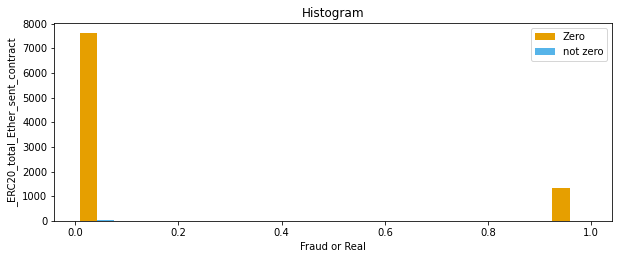

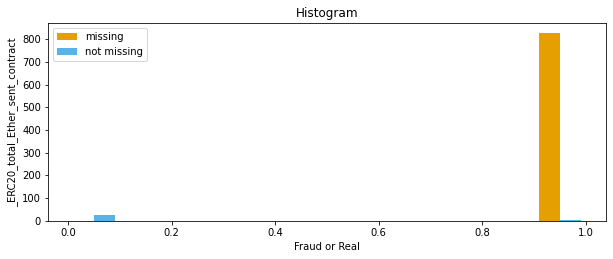

In [633]:
x1 = list(df1[df1['_ERC20_total_Ether_sent_contract'] == 0]['FLAG'])
x2 = list(df1[df1['_ERC20_total_Ether_sent_contract'] > 0]['FLAG'])

colors = ['#E69F00', '#56B4E9']
names = ['Zero', 'not zero']

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)

plt.hist([x1, x2],bins = int(180/15), color = colors, label=names)        

plt.legend()
plt.xlabel('Fraud or Real')
plt.ylabel('_ERC20_total_Ether_sent_contract')
plt.title('Histogram')

x3 = list(df1[df1['_ERC20_total_Ether_sent_contract'].isnull()]['FLAG'])
x4 = list(df1[df1['_ERC20_total_Ether_sent_contract']> 0]['FLAG'])

colors = ['#E69F00', '#56B4E9']
names = ['missing', 'not missing']

plt.figure(figsize=(10,8))
plt.subplot(2,1,2)

plt.hist([x3, x4],color = colors, label=names)        

plt.legend()
plt.xlabel('Fraud or Real')
plt.ylabel('_ERC20_total_Ether_sent_contract')
plt.title('Histogram')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Histogram')

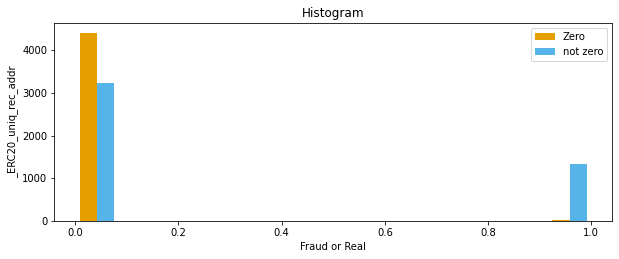

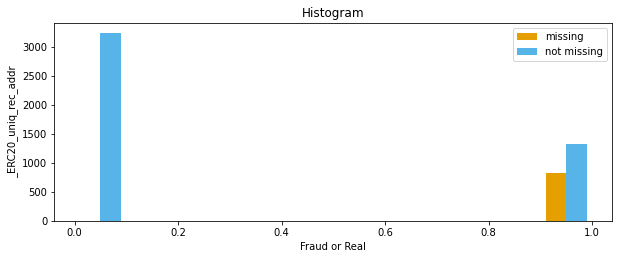

In [634]:
x1 = list(df1[df1['_ERC20_uniq_rec_addr'] == 0]['FLAG'])
x2 = list(df1[df1['_ERC20_uniq_rec_addr'] > 0]['FLAG'])

colors = ['#E69F00', '#56B4E9']
names = ['Zero', 'not zero']

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)

plt.hist([x1, x2],bins = int(180/15), color = colors, label=names)        

plt.legend()
plt.xlabel('Fraud or Real')
plt.ylabel('_ERC20_uniq_rec_addr')
plt.title('Histogram')

x3 = list(df1[df1['_ERC20_uniq_rec_addr'].isnull()]['FLAG'])
x4 = list(df1[df1['_ERC20_uniq_rec_addr']> 0]['FLAG'])

colors = ['#E69F00', '#56B4E9']
names = ['missing', 'not missing']

plt.figure(figsize=(10,8))
plt.subplot(2,1,2)

plt.hist([x3, x4],color = colors, label=names)        

plt.legend()
plt.xlabel('Fraud or Real')
plt.ylabel('_ERC20_uniq_rec_addr')
plt.title('Histogram')

#After comparing the histograms of distribution of zero, non zero, and null, the sent and received conditions have different nature. 

All missing values are considered to be fraud. However, as the number of missing values are large, we cannot leave the missing values as they are.

By looking at the histograms of sent and receive variables, we decided to impute the missing values with mean value of all data.

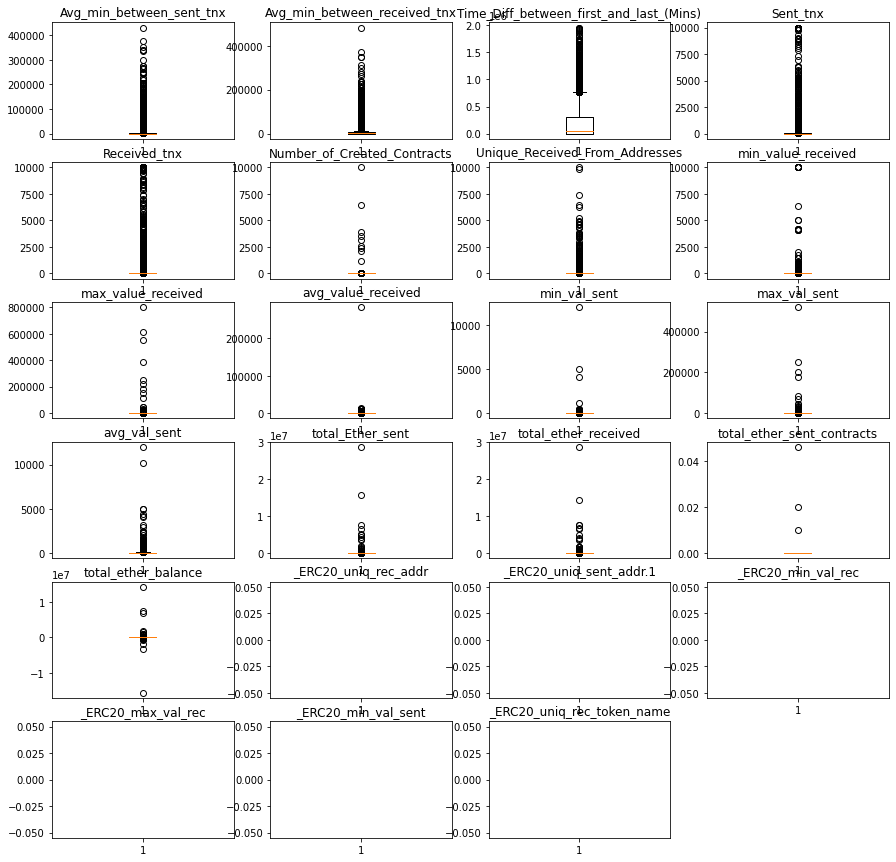

In [636]:
from IPython.core.pylabtools import figsize
f = plt.figure(figsize=(15,15))
plt.subplot(6, 4, 1)
plt.boxplot(df1['Avg_min_between_sent_tnx'])
plt.title("Avg_min_between_sent_tnx")

plt.subplot(6, 4, 2)
plt.boxplot(df1['Avg_min_between_received_tnx'])
plt.title("Avg_min_between_received_tnx")

plt.subplot(6, 4, 3)
plt.boxplot(df1['Time_Diff_between_first_and_last_(Mins)'])
plt.title("Time_Diff_between_first_and_last_(Mins)")

plt.subplot(6, 4, 4)
plt.boxplot(df1['Sent_tnx'])
plt.title("Sent_tnx")

plt.subplot(6, 4, 5)
plt.boxplot(df1['Received_Tnx'])
plt.title("Received_tnx")

plt.subplot(6, 4, 6)
plt.boxplot(df1['Number_of_Created_Contracts'])
plt.title("Number_of_Created_Contracts")

plt.subplot(6, 4, 7)
plt.boxplot(df1['Unique_Received_From_Addresses'])
plt.title("Unique_Received_From_Addresses")

plt.subplot(6, 4, 8)
plt.boxplot(df1['min_value_received'])
plt.title("min_value_received")

plt.subplot(6, 4, 9)
plt.boxplot(df1['max_value_received_'])
plt.title("max_value_received")

plt.subplot(6, 4, 10)
plt.boxplot(df1['avg_val_received'])
plt.title("avg_value_received")

plt.subplot(6, 4, 11)
plt.boxplot(df1['min_val_sent'])
plt.title("min_val_sent")

plt.subplot(6, 4, 12)
plt.boxplot(df1['max_val_sent'])
plt.title("max_val_sent")

plt.subplot(6, 4, 13)
plt.boxplot(df1['avg_val_sent'])
plt.title("avg_val_sent")

plt.subplot(6, 4, 14)
plt.boxplot(df1['total_Ether_sent'])
plt.title("total_Ether_sent")

plt.subplot(6, 4, 15)
plt.boxplot(df1['total_ether_received'])
plt.title("total_ether_received")

plt.subplot(6, 4, 16)
plt.boxplot(df1['total_ether_sent_contracts'])
plt.title("total_ether_sent_contracts")

plt.subplot(6, 4, 17)
plt.boxplot(df1['total_ether_balance'])
plt.title("total_ether_balance")

plt.subplot(6, 4, 18)
plt.boxplot(df1['_ERC20_uniq_rec_addr'])
plt.title("_ERC20_uniq_rec_addr")

plt.subplot(6, 4, 19)
plt.boxplot(df1['_ERC20_uniq_sent_addr.1'])
plt.title("_ERC20_uniq_sent_addr.1")

plt.subplot(6, 4, 20)
plt.boxplot(df1['_ERC20_min_val_rec'])
plt.title("_ERC20_min_val_rec")

plt.subplot(6, 4, 21)
plt.boxplot(df1['_ERC20_max_val_rec'])
plt.title("_ERC20_max_val_rec")

plt.subplot(6, 4, 22)
plt.boxplot(df1['_ERC20_min_val_sent'])
plt.title("_ERC20_min_val_sent")

plt.subplot(6, 4, 23)
plt.boxplot(df1['_ERC20_uniq_rec_token_name'])
plt.title("_ERC20_uniq_rec_token_name")
plt.show()

In [638]:
UL1 = df1['Avg_min_between_sent_tnx'].mean() + 3*df1['Avg_min_between_sent_tnx'].std()
UL2 = df1['Avg_min_between_received_tnx'].mean() + 3*df1['Avg_min_between_received_tnx'].std()
UL3 = df1['Time_Diff_between_first_and_last_(Mins)'].mean() + 3*df1['Time_Diff_between_first_and_last_(Mins)'].std()
UL4 = df1['Sent_tnx'].mean() + 3*df1['Sent_tnx'].std()
UL5 = df1['Received_Tnx'].mean() + 3*df1['Received_Tnx'].std()
UL6 = df1['Number_of_Created_Contracts'].mean() + 3*df1['Number_of_Created_Contracts'].std()
UL7 = df1['Unique_Received_From_Addresses'].mean() + 3*df1['Unique_Received_From_Addresses'].std()
UL8 = df1['min_value_received'].mean() + 3*df1['min_value_received'].std()
UL9 = df1['max_value_received_'].mean() + 3*df1['max_value_received_'].std()
UL10 = df1['avg_val_received'].mean() + 3*df1['avg_val_received'].std()
UL11 = df1['min_val_sent'].mean() + 3*df1['min_val_sent'].std()
UL12 = df1['max_val_sent'].mean() + 3*df1['max_val_sent'].std()
UL13 = df1['avg_val_sent'].mean() + 3*df1['avg_val_sent'].std()
UL14 = df1['total_Ether_sent'].mean() + 3*df1['total_Ether_sent'].std()
UL15 = df1['total_ether_received'].mean() + 3*df1['total_ether_received'].std()
UL16 = df1['total_ether_sent_contracts'].mean() + 3*df1['total_ether_sent_contracts'].std()
UL17 = df1['total_ether_balance'].mean() + 3*df1['total_ether_balance'].std()
UL18 = df1['_ERC20_total_Ether_sent_contract'].mean() + 3*df1['_ERC20_total_Ether_sent_contract'].std()
UL19 = df1['_ERC20_uniq_rec_addr'].mean() + 3*df1['_ERC20_uniq_rec_addr'].std()
UL20 = df1['_ERC20_uniq_sent_addr.1'].mean() + 3*df1['_ERC20_uniq_sent_addr.1'].std()
UL21 = df1['_ERC20_min_val_rec'].mean() + 3*df1['_ERC20_min_val_rec'].std()
UL22 = df1['_ERC20_max_val_rec'].mean() + 3*df1['_ERC20_max_val_rec'].std()
UL23 = df1['_ERC20_min_val_sent'].mean() + 3*df1['_ERC20_min_val_sent'].std()
UL24 = df1['_ERC20_uniq_rec_token_name'].mean() + 3*df1['_ERC20_uniq_rec_token_name'].std()


LL1 = df1['Avg_min_between_sent_tnx'].mean() - 3*df1['Avg_min_between_sent_tnx'].std()
LL2 = df1['Avg_min_between_received_tnx'].mean() - 3*df1['Avg_min_between_received_tnx'].std()
LL3 = df1['Time_Diff_between_first_and_last_(Mins)'].mean() - 3*df1['Time_Diff_between_first_and_last_(Mins)'].std()
LL4 = df1['Sent_tnx'].mean() - 3*df1['Sent_tnx'].std()
LL5 = df1['Received_Tnx'].mean() - 3*df1['Received_Tnx'].std()
LL6 = df1['Number_of_Created_Contracts'].mean() - 3*df1['Number_of_Created_Contracts'].std()
LL7 = df1['Unique_Received_From_Addresses'].mean() - 3*df1['Unique_Received_From_Addresses'].std()
LL8 = df1['min_value_received'].mean() - 3*df1['min_value_received'].std()
LL9 = df1['max_value_received_'].mean() - 3*df1['max_value_received_'].std()
LL10 = df1['avg_val_received'].mean() - 3*df1['avg_val_received'].std()
LL11 = df1['min_val_sent'].mean() - 3*df1['min_val_sent'].std()
LL12 = df1['max_val_sent'].mean() - 3*df1['max_val_sent'].std()
LL13 = df1['avg_val_sent'].mean() - 3*df1['avg_val_sent'].std()
LL14 = df1['total_Ether_sent'].mean() - 3*df1['total_Ether_sent'].std()
LL15 = df1['total_ether_received'].mean() - 3*df1['total_ether_received'].std()
LL16 = df1['total_ether_sent_contracts'].mean() - 3*df1['total_ether_sent_contracts'].std()
LL17 = df1['total_ether_balance'].mean() - 3*df1['total_ether_balance'].std()
LL18 = df1['_ERC20_total_Ether_sent_contract'].mean() - 3*df1['_ERC20_total_Ether_sent_contract'].std()
LL19 = df1['_ERC20_uniq_rec_addr'].mean() - 3*df1['_ERC20_uniq_rec_addr'].std()
LL20 = df1['_ERC20_uniq_sent_addr.1'].mean() - 3*df1['_ERC20_uniq_sent_addr.1'].std()
LL21 = df1['_ERC20_min_val_rec'].mean() - 3*df1['_ERC20_min_val_rec'].std()
LL22 = df1['_ERC20_max_val_rec'].mean() - 3*df1['_ERC20_max_val_rec'].std()
LL23 = df1['_ERC20_min_val_sent'].mean() - 3*df1['_ERC20_min_val_sent'].std()
LL24 = df1['_ERC20_uniq_rec_token_name'].mean() - 3*df1['_ERC20_uniq_rec_token_name'].std()


In [641]:
print(UL4)
print(LL4)

2387.6107960620707
-2155.7473675487086


In [643]:
df1['Avg_min_between_sent_tnx'] = np.where(df1['Avg_min_between_sent_tnx'] > UL1,UL1,
                                  np.where(df1['Avg_min_between_sent_tnx'] < LL1,LL1,df1['Avg_min_between_sent_tnx']))

df1['Avg_min_between_received_tnx'] = np.where(df1['Avg_min_between_received_tnx'] > UL2,UL2,
                                     np.where(df1['Avg_min_between_received_tnx'] < LL2,LL2,df1['Avg_min_between_received_tnx']))

df1['Time_Diff_between_first_and_last_(Mins)'] = np.where(df1['Time_Diff_between_first_and_last_(Mins)'] > UL3,UL3,
                                                 np.where(df1['Time_Diff_between_first_and_last_(Mins)'] < LL3,LL3,df1['Time_Diff_between_first_and_last_(Mins)']))

df1['Sent_tnx'] = np.where(df1['Sent_tnx'] > UL4,UL4,
                  np.where(df1['Sent_tnx'] < LL4,LL4,df1['Sent_tnx']))

df1['Received_Tnx'] = np.where(df1['Received_Tnx'] > UL5,UL5,
                      np.where(df1['Received_Tnx'] < LL5,LL5,df1['Received_Tnx']))

df1['Number_of_Created_Contracts'] = np.where(df1['Number_of_Created_Contracts'] > UL6,UL6,
                      np.where(df1['Number_of_Created_Contracts'] < LL6,LL6,df1['Number_of_Created_Contracts']))

df1['Unique_Received_From_Addresses'] = np.where(df1['Unique_Received_From_Addresses'] > UL7,UL7,
                      np.where(df1['Unique_Received_From_Addresses'] < LL7,LL7,df1['Unique_Received_From_Addresses']))

df1['min_value_received'] = np.where(df1['min_value_received'] > UL8,UL8,
                      np.where(df1['min_value_received'] < LL8,LL8,df1['min_value_received']))

df1['max_value_received_'] = np.where(df1['max_value_received_'] > UL9,UL9,
                      np.where(df1['max_value_received_'] < LL9,LL9,df1['max_value_received_']))

df1['avg_val_received'] = np.where(df1['avg_val_received'] > UL10,UL10,
                      np.where(df1['avg_val_received'] < LL10,LL10,df1['avg_val_received']))

df1['min_val_sent'] = np.where(df1['min_val_sent'] > UL11,UL11,
                      np.where(df1['min_val_sent'] < LL11,LL11,df1['min_val_sent']))

df1['max_val_sent'] = np.where(df1['max_val_sent'] > UL12,UL12,
                      np.where(df1['max_val_sent'] < LL12,LL12,df1['max_val_sent']))

df1['avg_val_sent'] = np.where(df1['avg_val_sent'] > UL13,UL13,
                      np.where(df1['avg_val_sent'] < LL13,LL13,df1['avg_val_sent']))

df1['total_Ether_sent'] = np.where(df1['total_Ether_sent'] > UL14,UL14,
                      np.where(df1['total_Ether_sent'] < LL14,LL14,df1['total_Ether_sent']))

df1['total_ether_received'] = np.where(df1['total_ether_received'] > UL15,UL15,
                      np.where(df1['total_ether_received'] < LL15,LL15,df1['total_ether_received']))

df1['total_ether_sent_contracts'] = np.where(df1['total_ether_sent_contracts'] > UL16,UL16,
                      np.where(df1['total_ether_sent_contracts'] < LL16,LL16,df1['total_ether_sent_contracts']))

df1['total_ether_balance'] = np.where(df1['total_ether_balance'] > UL17,UL17,
                      np.where(df1['total_ether_balance'] < LL17,LL17,df1['total_ether_balance']))

df1['_ERC20_total_Ether_sent_contract'] = np.where(df1['_ERC20_total_Ether_sent_contract'] > UL18,UL18,
                      np.where(df1['_ERC20_total_Ether_sent_contract'] < LL18,LL18,df1['_ERC20_total_Ether_sent_contract']))

df1['_ERC20_uniq_rec_addr'] = np.where(df1['_ERC20_uniq_rec_addr'] > UL19,UL19,
                      np.where(df1['_ERC20_uniq_rec_addr'] < LL19,LL19,df1['_ERC20_uniq_rec_addr']))

df1['_ERC20_uniq_sent_addr.1'] = np.where(df1['_ERC20_uniq_sent_addr.1'] > UL20,UL20,
                     np.where(df1['_ERC20_uniq_sent_addr.1'] < LL20,LL20,df1['_ERC20_uniq_sent_addr.1']))

df1['_ERC20_min_val_rec'] = np.where(df1['_ERC20_min_val_rec'] > UL21,UL21,
                      np.where(df1['_ERC20_min_val_rec'] < LL21,LL21,df1['_ERC20_min_val_rec']))

df1['_ERC20_max_val_rec'] = np.where(df1['_ERC20_max_val_rec'] > UL22,UL22,
                      np.where(df1['_ERC20_max_val_rec'] < LL22,LL22,df1['_ERC20_max_val_rec']))

df1['_ERC20_min_val_sent'] = np.where(df1['_ERC20_min_val_sent'] > UL23,UL23,
                      np.where(df1['_ERC20_min_val_sent'] < LL23,LL23,df1['_ERC20_min_val_sent']))

df1['_ERC20_uniq_rec_token_name'] = np.where(df1['_ERC20_uniq_rec_token_name'] > UL24,UL24,
                      np.where(df1['_ERC20_uniq_rec_token_name'] < LL24,LL24,df1['_ERC20_uniq_rec_token_name']))

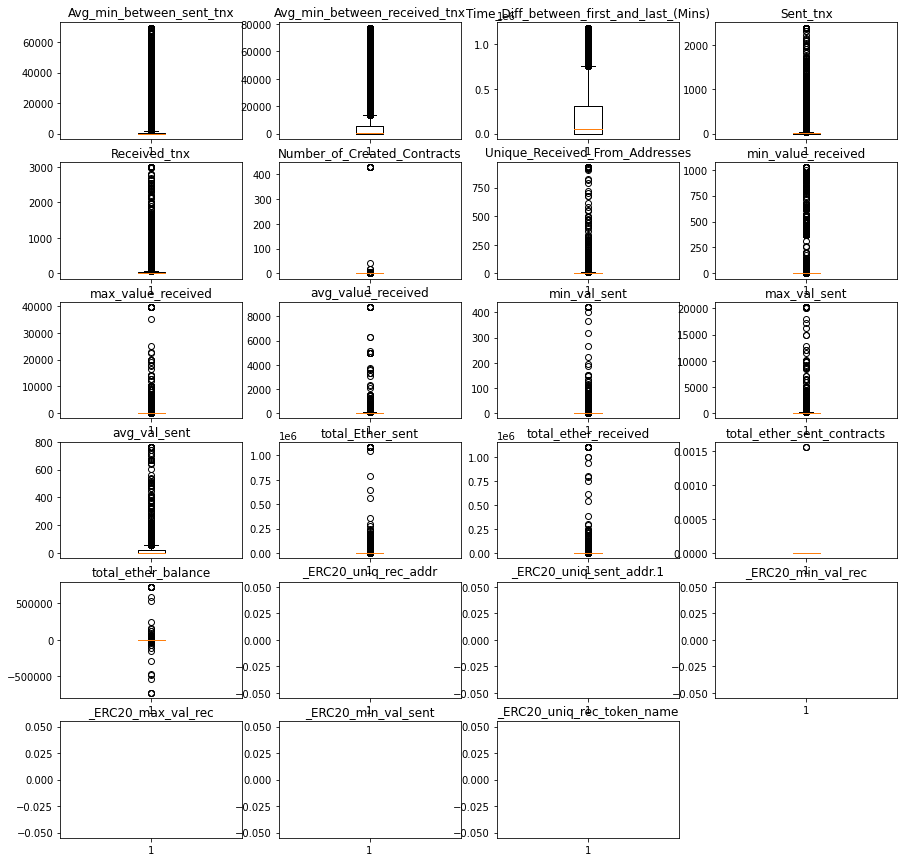

In [644]:
from IPython.core.pylabtools import figsize
f = plt.figure(figsize=(15,15))
plt.subplot(6, 4, 1)
plt.boxplot(df1['Avg_min_between_sent_tnx'])
plt.title("Avg_min_between_sent_tnx")

plt.subplot(6, 4, 2)
plt.boxplot(df1['Avg_min_between_received_tnx'])
plt.title("Avg_min_between_received_tnx")

plt.subplot(6, 4, 3)
plt.boxplot(df1['Time_Diff_between_first_and_last_(Mins)'])
plt.title("Time_Diff_between_first_and_last_(Mins)")

plt.subplot(6, 4, 4)
plt.boxplot(df1['Sent_tnx'])
plt.title("Sent_tnx")

plt.subplot(6, 4, 5)
plt.boxplot(df1['Received_Tnx'])
plt.title("Received_tnx")

plt.subplot(6, 4, 6)
plt.boxplot(df1['Number_of_Created_Contracts'])
plt.title("Number_of_Created_Contracts")

plt.subplot(6, 4, 7)
plt.boxplot(df1['Unique_Received_From_Addresses'])
plt.title("Unique_Received_From_Addresses")

plt.subplot(6, 4, 8)
plt.boxplot(df1['min_value_received'])
plt.title("min_value_received")

plt.subplot(6, 4, 9)
plt.boxplot(df1['max_value_received_'])
plt.title("max_value_received")

plt.subplot(6, 4, 10)
plt.boxplot(df1['avg_val_received'])
plt.title("avg_value_received")

plt.subplot(6, 4, 11)
plt.boxplot(df1['min_val_sent'])
plt.title("min_val_sent")

plt.subplot(6, 4, 12)
plt.boxplot(df1['max_val_sent'])
plt.title("max_val_sent")

plt.subplot(6, 4, 13)
plt.boxplot(df1['avg_val_sent'])
plt.title("avg_val_sent")

plt.subplot(6, 4, 14)
plt.boxplot(df1['total_Ether_sent'])
plt.title("total_Ether_sent")

plt.subplot(6, 4, 15)
plt.boxplot(df1['total_ether_received'])
plt.title("total_ether_received")

plt.subplot(6, 4, 16)
plt.boxplot(df1['total_ether_sent_contracts'])
plt.title("total_ether_sent_contracts")

plt.subplot(6, 4, 17)
plt.boxplot(df1['total_ether_balance'])
plt.title("total_ether_balance")

plt.subplot(6, 4, 18)
plt.boxplot(df1['_ERC20_uniq_rec_addr'])
plt.title("_ERC20_uniq_rec_addr")

plt.subplot(6, 4, 19)
plt.boxplot(df1['_ERC20_uniq_sent_addr.1'])
plt.title("_ERC20_uniq_sent_addr.1")

plt.subplot(6, 4, 20)
plt.boxplot(df1['_ERC20_min_val_rec'])
plt.title("_ERC20_min_val_rec")

plt.subplot(6, 4, 21)
plt.boxplot(df1['_ERC20_max_val_rec'])
plt.title("_ERC20_max_val_rec")

plt.subplot(6, 4, 22)
plt.boxplot(df1['_ERC20_min_val_sent'])
plt.title("_ERC20_min_val_sent")

plt.subplot(6, 4, 23)
plt.boxplot(df1['_ERC20_uniq_rec_token_name'])
plt.title("_ERC20_uniq_rec_token_name")
plt.show()

In [647]:
#df.fillna(0)
df1.fillna(df1.median(), inplace=True)

#Data Preparation

In [648]:
X = df1.drop(columns='FLAG')
y = df1['FLAG']

In [649]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7380, 24) (7380,)
(2461, 24) (2461,)


In [650]:
from sklearn import preprocessing

std_scale = preprocessing.MinMaxScaler().fit(X_train)
X_train_std = std_scale.fit_transform(X_train)
X_test_std  = std_scale.transform(X_test)

#Handling Imbalanced Data

In [651]:
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train_std, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({0: 5746, 1: 5746})


In [652]:
print(f'Shape of the training before SMOTE: {X_train_std.shape, y_train.shape}')

print(f'Shape of the training after SMOTE: {X_train_SMOTE.shape, y_train_SMOTE.shape}')

Shape of the training before SMOTE: ((7380, 24), (7380,))
Shape of the training after SMOTE: ((11492, 24), (11492,))


In [653]:
v = sum(y_train == 0)
j = sum(y_train == 1)
print(f'non_fraud before oversampling: {v} \n Fauds before oversampling: {j}')

R = sum(y_train_SMOTE == 0)
M = sum(y_train_SMOTE == 1)
print(f'non_fraud after oversampling: {R} \n Fauds after oversampling: {M}')

non_fraud before oversampling: 5746 
 Fauds before oversampling: 1634
non_fraud after oversampling: 5746 
 Fauds after oversampling: 5746


#Logistic Regression

---



*   Build the logistic model
*   Confusion matrix
*   Plot the heatmap
*   List item



In [654]:
logit_reg = LogisticRegression(solver = "lbfgs", C=1e42, random_state=100)
logit_reg.fit(X_train_SMOTE,y_train_SMOTE)

y_pred=logit_reg.predict(X_test_std)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [655]:
from sklearn.metrics import  confusion_matrix
cm_new = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n")
print(cm_new)
tn = cm_new[0][0]
fp = cm_new[0][1]
fn = cm_new[1][0]
tp = cm_new[1][1]

print("\nTotal number of true positives", tp)
print("Total number of false negatives",fn)
print("Total number of false positives",fp)
print("Total number of true negatives",tn)

acc=float(tp+tn)/(tp+tn+fp+fn)

print('\nClassifier Accuracy: %.2f%%' % (acc * 100))

tpr = float(tp)/(tp+fn)

print('True Positive Rate (TPR/Recall/Sensitivity): %.2f%%' % (tpr * 100))

specificity = float (tn)/(tn+fp)

print ("True Negative Rate (TNR/Specificity/selectivity):%.2f%%" % (specificity*100)) 

fpr = float(fp)/(fp+tn)
print("False Positive Rate (FPR): %.2f%%" % (fpr * 100))

fnr = fn/ (fn+ tp)
print("False Negative Rate (FNR): %.2f%%" % (fnr*100))

precision=float(tp)/(tp+fp)
print("Precision/Positive Predictive value:%.2f%%" %(precision*100))

fScore = 2*((precision*tpr)/(precision+tpr))
print("F1-Score: %.2f%%" %(fScore*100))

Confusion matrix:

[[1428  488]
 [  51  494]]

Total number of true positives 494
Total number of false negatives 51
Total number of false positives 488
Total number of true negatives 1428

Classifier Accuracy: 78.10%
True Positive Rate (TPR/Recall/Sensitivity): 90.64%
True Negative Rate (TNR/Specificity/selectivity):74.53%
False Positive Rate (FPR): 25.47%
False Negative Rate (FNR): 9.36%
Precision/Positive Predictive value:50.31%
F1-Score: 64.70%


Text(0.5, 257.44, 'Predicted label')

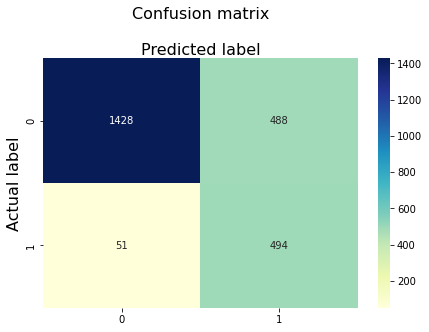

In [656]:
cls_names=[0,1] # name  of classes
fig, ax = plt.subplots()
ticks = np.arange(len(cls_names))
plt.xticks(ticks, cls_names)
plt.yticks(ticks, cls_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_new), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 16)
plt.ylabel('Actual label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)

In [657]:
logit_reg.intercept_

array([7.04478471])

In [658]:
print(pd.DataFrame({'coef': logit_reg.coef_[0]}, index=X.columns))

                                               coef
Avg_min_between_sent_tnx                   0.357955
Avg_min_between_received_tnx              -1.466544
Time_Diff_between_first_and_last_(Mins)   -6.361045
Sent_tnx                                 -86.764439
Received_Tnx                            -107.996895
Number_of_Created_Contracts               -3.887988
Unique_Received_From_Addresses            95.860822
min_value_received                       -76.784099
max_value_received_                      -51.999847
avg_val_received                          96.554452
min_val_sent                              24.942652
max_val_sent                              38.554847
avg_val_sent                             -32.671775
total_Ether_sent                         -18.095869
total_ether_received                     -54.894933
total_ether_sent_contracts                -3.945158
total_ether_balance                      -11.892784
_ERC20_total_Ether_sent_contract           8.671737
_ERC20_uniq_

In [659]:
logit_reg_prob = logit_reg.predict_proba(X_test_std)

logit_reg_pred = logit_reg.predict(X_test_std)

In [660]:
logit_result = pd.DataFrame({'actual' : y_test,
                             'p_0' : [p[0] for p in logit_reg_prob],
                             'p_1' : [p[1] for p in logit_reg_prob],
                             'predicted': logit_reg_pred})
logit_result

,actual,p_0,p_1,predicted
5469,0,0.709942,2.900580e-01,0
4979,0,0.765049,2.349512e-01,0
3716,0,0.626208,3.737922e-01,0
7290,0,0.998884,1.116489e-03,0
3697,0,0.827164,1.728362e-01,0
...,...,...,...,...
3140,0,1.000000,2.075423e-36,0
1861,0,0.248503,7.514972e-01,1
1793,0,0.999999,1.315320e-06,0
6609,0,0.998879,1.120646e-03,0


In [661]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, logit_reg_pred)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error of logistic regression model:",RMSE)

Root Mean Square Error of logistic regression model: 0.46799215794108334


In [662]:
#accuracy for training data by logistic regression
classificationSummary(y_train_SMOTE, logit_reg.predict(X_train_SMOTE))

Confusion Matrix (Accuracy 0.8340)

       Prediction
Actual    0    1
     0 4282 1464
     1  444 5302


In [663]:
#accuracy for test data by logistic regression
classificationSummary(y_test, logit_reg.predict(X_test_std))

Confusion Matrix (Accuracy 0.7810)

       Prediction
Actual    0    1
     0 1428  488
     1   51  494


In [664]:
fraud = logit_result.sort_values(by=['p_1'], ascending=False)
fraud

,actual,p_0,p_1,predicted
8595,1,0.000000e+00,1.000000e+00,1
2308,0,6.820970e-07,9.999993e-01,1
4362,0,2.014513e-06,9.999980e-01,1
9404,1,2.965142e-06,9.999970e-01,1
8591,1,7.722747e-06,9.999923e-01,1
...,...,...,...,...
743,0,1.000000e+00,1.387430e-86,0
3504,0,1.000000e+00,7.680427e-87,0
1521,0,1.000000e+00,3.470788e-87,0
2277,0,1.000000e+00,1.308390e-104,0


In [665]:
!pip install dmba
from dmba import gainsChart, liftChart
from dmba.metric import AIC_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


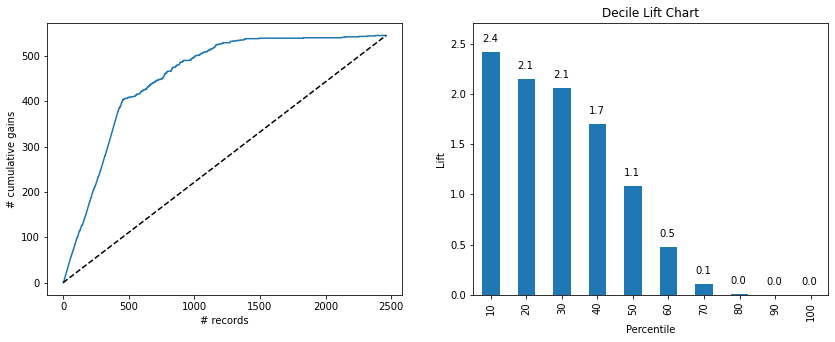

In [666]:
fig, axes = plt.subplots(1,2, figsize=(14,5))
gainsChart(fraud.actual,ax=axes[0])
liftChart(fraud['p_1'],ax=axes[1])

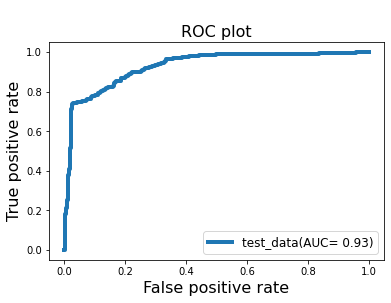

In [667]:
import sklearn.metrics as metrics
y_pred_proba = logit_reg.predict_proba(X_test_std)[::,1] #calculate probabilities for flag YES (label=1)

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba) # calculate tpr and fpr values

auc = metrics.roc_auc_score(y_test, y_pred_proba) #calculate auc value

plt.plot(fpr,tpr,label="test_data(AUC= %0.2f)" % auc, linewidth = 4) #plot ROC curve
plt.legend(prop={'size':12},loc='best') #set the legend properties
plt.title('\nROC plot',fontsize = 16) #title
plt.xlabel('False positive rate', fontsize = 16) #x and y labels
plt.ylabel('True positive rate', fontsize = 16)
plt.show() #display the plot

In [668]:
from sklearn.metrics import roc_auc_score
print("ROC AUC score before training data: ", roc_auc_score(y_test, y_pred))
print("ROC AUC score after training data: ", roc_auc_score(y_test, y_pred_proba))

ROC AUC score before training data:  0.825862366168049
ROC AUC score after training data:  0.9294286644576815


The best ROC score is defined as 1 and its score inclined after regression model from 0.69 to 0.90 after using regression model.

#Random Forest Regression

---



*  Finding the best parameter for random forest
*  Fitting the model
*  Finding the accuracy
*  Checking the overfitting
*  RMSE
*  Sorting important features




In [669]:
#Finding the best parameter for random forest

from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [670]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_SMOTE, y_train_SMOTE)

In [671]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [672]:
#Fitting the model
rf = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=100,max_features='auto',random_state=42)
rf.fit(X_train_SMOTE, y_train_SMOTE)


RandomForestClassifier(criterion='entropy', max_depth=8, random_state=42)

In [673]:
from sklearn.metrics import  confusion_matrix
cm_new = confusion_matrix(y_test, rf.predict(X_test_std))
print("Confusion matrix:\n")
print(cm_new)
tn = cm_new[0][0]
fp = cm_new[0][1]
fn = cm_new[1][0]
tp = cm_new[1][1]
print("\nTotal number of true positives", tp)
print("Total number of false negatives",fn)
print("Total number of false positives",fp)
print("Total number of true negatives",tn)

acc=float(tp+tn)/(tp+tn+fp+fn)
print('\nClassifier Accuracy: %.2f%%' % (acc * 100))

tpr = float(tp)/(tp+fn)
print('True Positive Rate (TPR/Recall/Sensitivity): %.2f%%' % (tpr * 100))

specificity = float (tn)/(tn+fp)
print ("True Negative Rate (TNR/Specificity/selectivity):%.2f%%" % (specificity*100)) 

fpr = float(fp)/(fp+tn)
print("False Positive Rate (FPR): %.2f%%" % (fpr * 100))
fnr = fn/ (fn+ tp)
print("False Negative Rate (FNR): %.2f%%" % (fnr*100))

precision=float(tp)/(tp+fp)
print("Precision/Positive Predictive value:%.2f%%" %(precision*100))

fScore = 2*((precision*tpr)/(precision+tpr))
print("F1-Score: %.2f%%" %(fScore*100))

Confusion matrix:

[[1851   65]
 [  18  527]]

Total number of true positives 527
Total number of false negatives 18
Total number of false positives 65
Total number of true negatives 1851

Classifier Accuracy: 96.63%
True Positive Rate (TPR/Recall/Sensitivity): 96.70%
True Negative Rate (TNR/Specificity/selectivity):96.61%
False Positive Rate (FPR): 3.39%
False Negative Rate (FNR): 3.30%
Precision/Positive Predictive value:89.02%
F1-Score: 92.70%


0.994556702610561


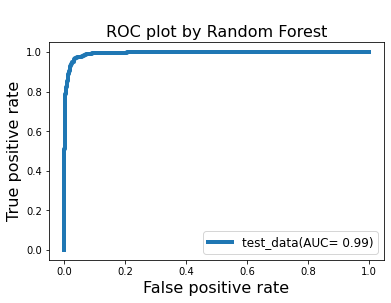

In [674]:
import sklearn.metrics as metrics
y_pred_proba11 = rf.predict_proba(X_test_std)[::,1] #calculate probabilities for flag YES (label=1)

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba11) # calculate tpr and fpr values

auc = metrics.roc_auc_score(y_test, y_pred_proba11) #calculate auc value
print(auc)

plt.plot(fpr,tpr,label="test_data(AUC= %0.2f)" % auc, linewidth = 4) #plot ROC curve
plt.legend(prop={'size':12},loc='best') #set the legend properties
plt.title('\nROC plot by Random Forest',fontsize = 16) #title
plt.xlabel('False positive rate', fontsize = 16) #x and y labels
plt.ylabel('True positive rate', fontsize = 16)
plt.show() #display the plot

0.9954741338032216


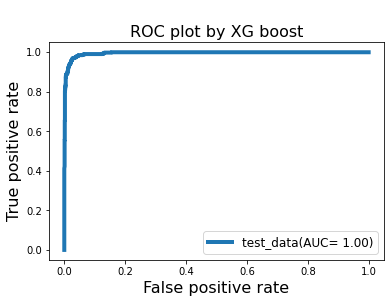

In [675]:
import sklearn.metrics as metrics
y_pred_proba14 = xg_reg.predict_proba(X_test_std)[::,1] #calculate probabilities for flag YES (label=1)

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba14) # calculate tpr and fpr values

auc = metrics.roc_auc_score(y_test, y_pred_proba14) #calculate auc value
print(auc)

plt.plot(fpr,tpr,label="test_data(AUC= %0.2f)" % auc, linewidth = 4) #plot ROC curve
plt.legend(prop={'size':12},loc='best') #set the legend properties
plt.title('\nROC plot by XG boost',fontsize = 16) #title
plt.xlabel('False positive rate', fontsize = 16) #x and y labels
plt.ylabel('True positive rate', fontsize = 16)
plt.show() #display the plot

In [676]:
#accuracy for trainig data by random forest
classificationSummary(y_train_SMOTE, rf.predict(X_train_SMOTE))

Confusion Matrix (Accuracy 0.9842)

       Prediction
Actual    0    1
     0 5608  138
     1   44 5702


In [677]:
#RMSE using random forest
from sklearn.metrics import mean_squared_error
preds_rf = rf.predict(X_test_std)
rmse_rf = np.sqrt(mean_squared_error(y_test, preds_rf))
print("RMSE after random forest regression: %f" % (rmse_rf))

RMSE after random forest regression: 0.183647


Text(0.5, 0, 'Feature Importance')

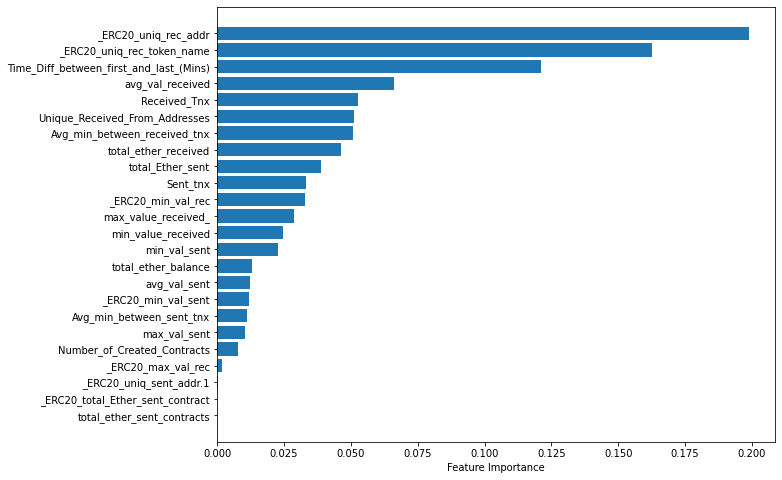

In [678]:
plt.figure(figsize=(10,8))
df2 = pd.DataFrame(X_train_std,columns=X_train.columns)
sort = rf.feature_importances_.argsort()
plt.barh(df2.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [679]:
df2.columns[sort], rf.feature_importances_[sort]

(Index(['total_ether_sent_contracts', '_ERC20_total_Ether_sent_contract',
        '_ERC20_uniq_sent_addr.1', '_ERC20_max_val_rec',
        'Number_of_Created_Contracts', 'max_val_sent',
        'Avg_min_between_sent_tnx', '_ERC20_min_val_sent', 'avg_val_sent',
        'total_ether_balance', 'min_val_sent', 'min_value_received',
        'max_value_received_', '_ERC20_min_val_rec', 'Sent_tnx',
        'total_Ether_sent', 'total_ether_received',
        'Avg_min_between_received_tnx', 'Unique_Received_From_Addresses',
        'Received_Tnx', 'avg_val_received',
        'Time_Diff_between_first_and_last_(Mins)', '_ERC20_uniq_rec_token_name',
        '_ERC20_uniq_rec_addr'],
       dtype='object'),
 array([0.00000000e+00, 1.39658659e-04, 1.91986912e-04, 1.71166744e-03,
        8.00521411e-03, 1.05827921e-02, 1.11388998e-02, 1.19768207e-02,
        1.22634976e-02, 1.31124174e-02, 2.26951196e-02, 2.47601785e-02,
        2.88365113e-02, 3.27212025e-02, 3.32424288e-02, 3.89171514e-02,
        4

In [680]:
rf.feature_importances_[sort] < 0.02

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [681]:
rf.feature_importances_[sort] < 0.01

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

#XG boost


---
*  Fitting the model
*  RMSE
*  Finding the accuracy
*  Checking the overfitting
*  Sorting important features


In [704]:
import xgboost as xgb

xg_reg = xgb.XGBClassifier(colsample_bytree = 0.5,n_estimators = 80, random_state=55)

xg_reg.fit(X_train_SMOTE,y_train_SMOTE)
preds1 = xg_reg.predict(X_test_std)

rmse2 = np.sqrt(mean_squared_error(y_test, preds1))
print("RMSE after XG Boost: %f" % (rmse2))
print(classificationSummary(y_test, preds1))

RMSE after XG Boost: 0.172229
Confusion Matrix (Accuracy 0.9703)

       Prediction
Actual    0    1
     0 1857   59
     1   14  531
None


In [705]:
#for train data set
classificationSummary(y_train_SMOTE, xg_reg.predict(X_train_SMOTE))

Confusion Matrix (Accuracy 0.9809)

       Prediction
Actual    0    1
     0 5590  156
     1   64 5682


In [685]:
from sklearn.metrics import  confusion_matrix
cm_new = confusion_matrix(y_test, xg_reg.predict(X_test_std))
print("Confusion matrix:\n")
print(cm_new)
tn = cm_new[0][0]
fp = cm_new[0][1]
fn = cm_new[1][0]
tp = cm_new[1][1]
print("\nTotal number of true positives", tp)
print("Total number of false negatives",fn)
print("Total number of false positives",fp)
print("Total number of true negatives",tn)

acc=float(tp+tn)/(tp+tn+fp+fn)
print('\nClassifier Accuracy: %.2f%%' % (acc * 100))

tpr = float(tp)/(tp+fn)
print('True Positive Rate (TPR/Recall/Sensitivity): %.2f%%' % (tpr * 100))
specificity = float (tn)/(tn+fp)
print ("True Negative Rate (TNR/Specificity/selectivity):%.2f%%" % (specificity*100)) 

fpr = float(fp)/(fp+tn)
print("False Positive Rate (FPR): %.2f%%" % (fpr * 100))
fnr = fn/ (fn+ tp)
print("False Negative Rate (FNR): %.2f%%" % (fnr*100))

precision=float(tp)/(tp+fp)
print("Precision/Positive Predictive value:%.2f%%" %(precision*100))

fScore = 2*((precision*tpr)/(precision+tpr))
print("F1-Score: %.2f%%" %(fScore*100))

Confusion matrix:

[[1857   59]
 [  14  531]]

Total number of true positives 531
Total number of false negatives 14
Total number of false positives 59
Total number of true negatives 1857

Classifier Accuracy: 97.03%
True Positive Rate (TPR/Recall/Sensitivity): 97.43%
True Negative Rate (TNR/Specificity/selectivity):96.92%
False Positive Rate (FPR): 3.08%
False Negative Rate (FNR): 2.57%
Precision/Positive Predictive value:90.00%
F1-Score: 93.57%


Text(0.5, 0, 'Feature Importance of Xg boost')

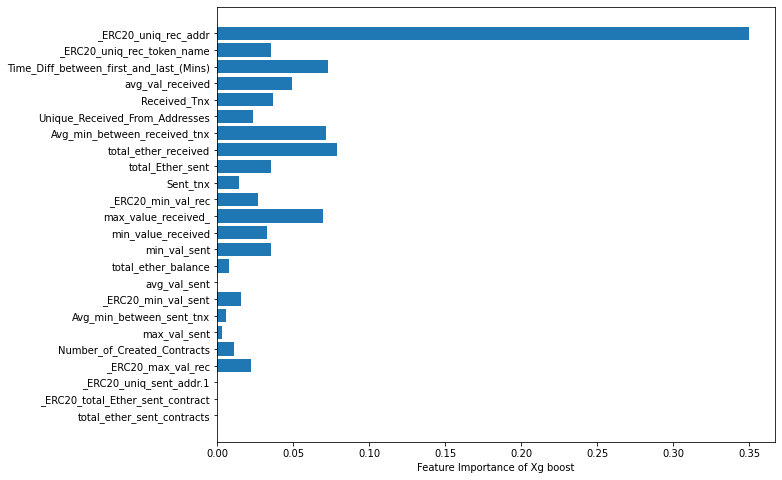

In [686]:
plt.figure(figsize=(10,8))
sort_xgb = xg_reg.feature_importances_.argsort()
plt.barh(df2.columns[sort], xg_reg.feature_importances_[sort])
plt.xlabel("Feature Importance of Xg boost")

# Dropping some variables looking at the important features from random forest and XG boost and re run the regression model


---



*   X,y & handle imbalanced data
*   Build the model
*   Confusion matrix
*   Check overfitting
*   Plot heatmap




In [687]:
data = df1.drop(columns=['total_ether_sent_contracts','total_ether_balance','total_Ether_sent',
                         'max_val_sent', 'Avg_min_between_sent_tnx'])

In [688]:
data1 = df1.drop(columns = ['total_ether_received','avg_val_sent',
                            'Number_of_Created_Contracts','min_value_received'])

In [712]:
data3 = df1.drop(columns=['total_ether_sent_contracts','_ERC20_uniq_sent_addr.1','_ERC20_total_Ether_sent_contract','avg_val_sent'])

In [ ]:
data3.info()

In [713]:
# here we tested df3, data, and data1. The accuracy is not much different between them.
# So it can be said that the accuracy of logistic regression is only around 80% within 24 to 19 important variables.

X = data3.drop(columns='FLAG')
y = data3['FLAG']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = 5)

std_scale = preprocessing.MinMaxScaler().fit(X_train)
train_X_std = std_scale.fit_transform(train_X)
test_X_std  = std_scale.transform(test_X)

from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

SMOTE = SMOTE()

# fit and apply the transform
train_X_SMOTE, train_y_SMOTE = SMOTE.fit_resample(train_X_std, train_y)



In [714]:
logit_reg1 = LogisticRegression(solver='liblinear', C=1e42, random_state=1)
#logit_reg = LogisticRegression()
logit_reg1.fit(train_X_SMOTE,train_y_SMOTE)

y_pred1=logit_reg1.predict(test_X_std)

print(classificationSummary(y_test, y_pred1))

Confusion Matrix (Accuracy 0.7688)

       Prediction
Actual    0    1
     0 1402  514
     1   55  490
None


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [715]:
#accuracy for training dataset
print(classificationSummary(train_y_SMOTE,logit_reg1.predict(train_X_SMOTE)))

Confusion Matrix (Accuracy 0.8301)

       Prediction
Actual    0    1
     0 4236 1510
     1  442 5304
None


Text(0.5, 257.44, 'Predicted label')

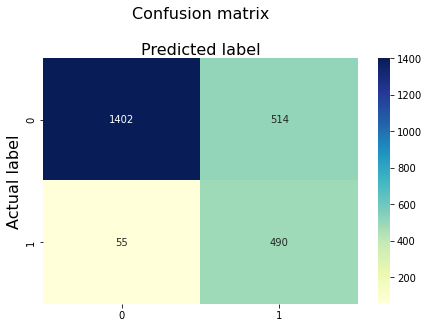

In [716]:
V = confusion_matrix(y_test, y_pred1)
cls_names=[0,1] # name  of classes
fig, ax = plt.subplots()
ticks = np.arange(len(cls_names))
plt.xticks(ticks, cls_names)
plt.yticks(ticks, cls_names)
# create heatmap
sns.heatmap(pd.DataFrame(V), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 16)
plt.ylabel('Actual label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)

In [717]:
import xgboost as xgb

xg_reg1 = xgb.XGBClassifier(colsample_bytree = 0.2,n_estimators = 50, random_state=45)

xg_reg1.fit(train_X_SMOTE,train_y_SMOTE)
preds11 = xg_reg1.predict(test_X_std)

rmse11 = np.sqrt(mean_squared_error(y_test, preds1))
print("RMSE after XG Boost: %f" % (rmse11))
print(classificationSummary(y_test, preds11))

RMSE after XG Boost: 0.172229
Confusion Matrix (Accuracy 0.9537)

       Prediction
Actual    0    1
     0 1825   91
     1   23  522
None


In [711]:
classificationSummary(y_train_SMOTE, xg_reg.predict(X_train_SMOTE))

Confusion Matrix (Accuracy 0.9809)

       Prediction
Actual    0    1
     0 5590  156
     1   64 5682


# Comparing and deciding the best model

In [718]:
print("RMSE after random forest regression: %f" % (rmse_rf))
print("RMSE after XG Boost: %f" % (rmse2))
print("RMSE after Logistic Regression:",RMSE)

RMSE after random forest regression: 0.183647
RMSE after XG Boost: 0.172229
RMSE after Logistic Regression: 0.46799215794108334


XG boost model is the best model for this project as it has the highest accuracy of 97.03% and least root mean squared error compared to random forest and logistic regression.